In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels as sm
import sklearn

In [3]:
data=pd.read_csv(r"/content/drive/MyDrive/Microsoft_Stock.csv")

In [5]:
data.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

In [4]:
data['Date'] = pd.to_datetime(data['Date'])

In [7]:
data.dtypes

Date      datetime64[ns]
Open             float64
High             float64
Low              float64
Close            float64
Volume             int64
dtype: object

In [8]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2015-04-01 16:00:00,40.60,40.76,40.31,40.72,36865322
1,2015-04-02 16:00:00,40.66,40.74,40.12,40.29,37487476
2,2015-04-06 16:00:00,40.34,41.78,40.18,41.55,39223692
3,2015-04-07 16:00:00,41.61,41.91,41.31,41.53,28809375
4,2015-04-08 16:00:00,41.48,41.69,41.04,41.42,24753438


In [9]:
data.shape

(1511, 6)

In [10]:
data.describe()

,Date,Open,High,Low,Close,Volume
count,1511,1511.000000,1511.000000,1511.000000,1511.000000,1.511000e+03
mean,2018-03-31 17:23:44.751820032,107.385976,108.437472,106.294533,107.422091,3.019863e+07
min,2015-04-01 16:00:00,40.340000,40.740000,39.720000,40.290000,1.016120e+05
25%,2016-09-29 04:00:00,57.860000,58.060000,57.420000,57.855000,2.136213e+07
50%,2018-04-02 16:00:00,93.990000,95.100000,92.920000,93.860000,2.662962e+07
75%,2019-10-01 04:00:00,139.440000,140.325000,137.825000,138.965000,3.431962e+07
max,2021-03-31 16:00:00,245.030000,246.130000,242.920000,244.990000,1.352271e+08
std,NaN,56.691333,57.382276,55.977155,56.702299,1.425266e+07


In [11]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [5]:
data.set_index('Date', inplace=True)

In [13]:
data.dtypes

Open      float64
High      float64
Low       float64
Close     float64
Volume      int64
dtype: object

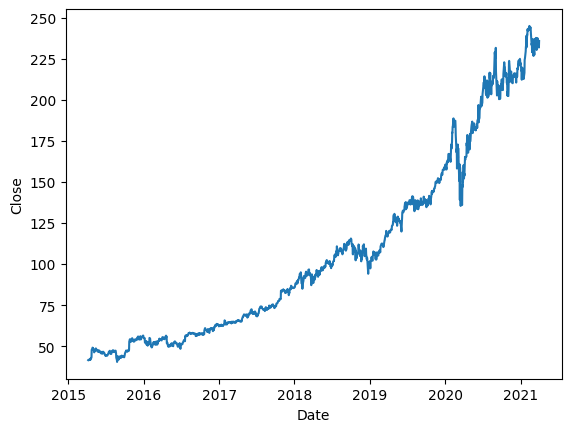

In [31]:
import matplotlib.ticker as ticker
ax=sns.lineplot(data=data,x=data.index,y=data['Close'])

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [6]:
data.dropna(inplace=True)

In [17]:
# Perform time series decomposition (additive model)
add_result = seasonal_decompose(data['Close'], model='additive', period=1)

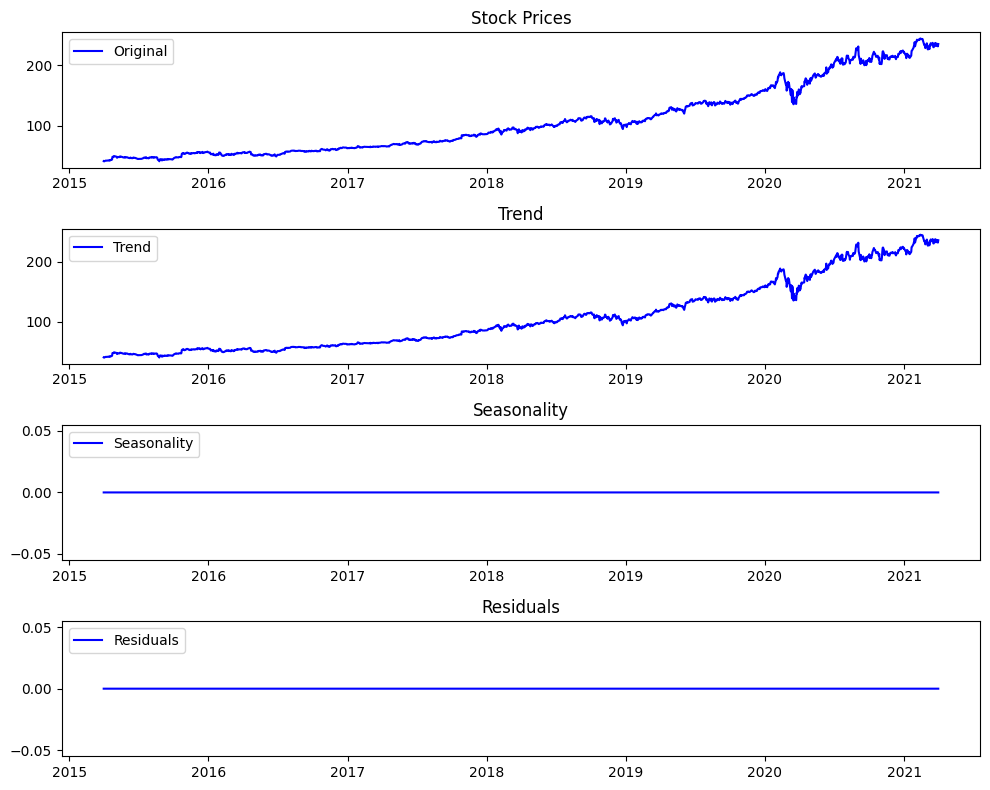

In [18]:
# Plotting the decomposed components
plt.figure(figsize=(10, 8))

plt.subplot(411)
plt.plot(data.index, data['Close'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.title('Stock Prices')

plt.subplot(412)
plt.plot(data.index, add_result.trend, label='Trend', color='blue')
plt.legend(loc='upper left')
plt.title('Trend')

plt.subplot(413)
plt.plot(data.index, add_result.seasonal, label='Seasonality', color='blue')
plt.legend(loc='upper left')
plt.title('Seasonality')

plt.subplot(414)
plt.plot(data.index, add_result.resid, label='Residuals', color='blue')
plt.legend(loc='upper left')
plt.title('Residuals')

plt.tight_layout()
plt.show()

In [ ]:
#Trend Interpretation: The gradual upward trend indicates that over the observed period,
# the stock prices have been steadily increasing over time.

In [ ]:
#Seasonality Interpretation: The absence of seasonality suggests that the stock prices do not exhibit recurring patterns
#or cycles at regular intervals, such as daily, weekly, monthly, or annual fluctuations

In [ ]:
#Residual Components Interpretation: Minimal residual components indicate that the trend component (gradual upward movement)
# explains a significant portion of the variability in the stock prices.

In [19]:
from statsmodels.tsa.stattools import adfuller

def stationarity_check(timeseries):
    # Perform ADF test
    result = adfuller(timeseries)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

stationarity_check(data['Close'])


ADF Statistic: 1.7371362899270975
p-value: 0.9982158366942122
Critical Values:
	1%: -3.435
	5%: -2.863
	10%: -2.568


In [8]:
from statsmodels.tsa.stattools import adfuller

In [9]:
# Compute first-order difference
data['Close_diff'] = data['Close'].diff()

# Drop NaN values resulting from differencing
data.dropna(inplace=True)

# Perform ADF test on the differenced series
result_diff = adfuller(data['Close_diff'])
print('ADF Statistic:', result_diff[0])
print('p-value:', result_diff[1])
print('Critical Values:')
for key, value in result_diff[4].items():
    print(f'\t{key}: {value}')


ADF Statistic: -10.041090920097512
p-value: 1.495628953957568e-17
Critical Values:
	1%: -3.4347641828771405
	5%: -2.863489576334964
	10%: -2.5678079331921446


In [10]:
# Compute second-order difference
data['Close_diff2'] = data['Close_diff'].diff()

# Drop NaN values resulting from differencing
data.dropna(inplace=True)

# Perform ADF test on the second-order differenced series
result_diff2 = adfuller(data['Close_diff2'])
print('ADF Statistic (Second Diff):', result_diff2[0])
print('p-value (Second Diff):', result_diff2[1])
print('Critical Values:')
for key, value in result_diff2[4].items():
    print(f'\t{key}: {value}')

ADF Statistic (Second Diff): -15.438876857679421
p-value (Second Diff): 2.882669721655886e-28
Critical Values:
	1%: -3.434752296229329
	5%: -2.8634843303184447
	10%: -2.5678051396295816


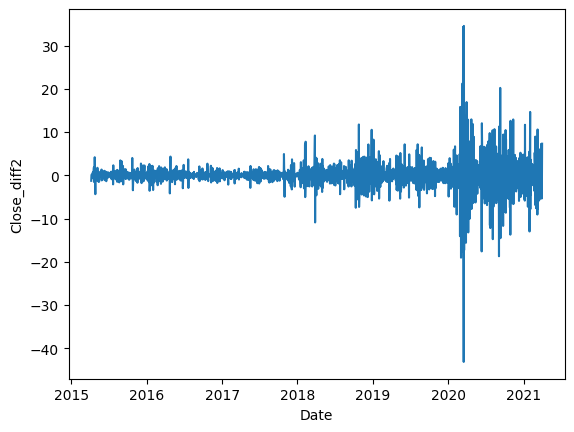

In [32]:
import matplotlib.ticker as ticker
ax=sns.lineplot(data=data,x=data.index,y=data['Close_diff2'])

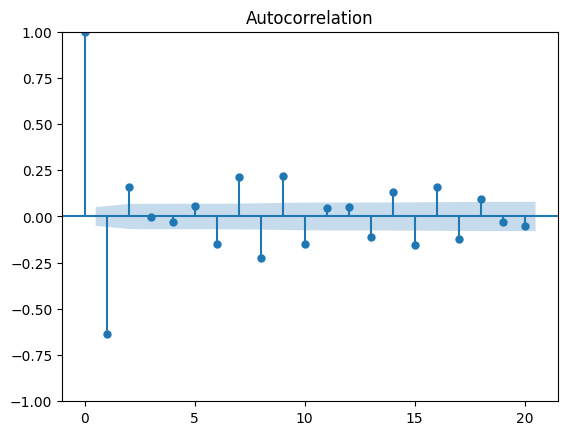

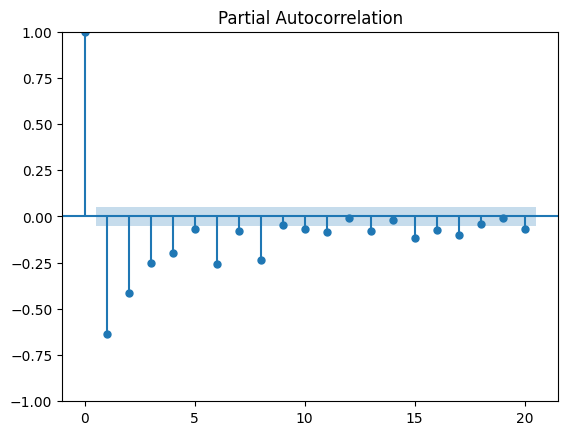

In [24]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# ACF and PACF plots
plot_acf(data['Close_diff2'], lags=20)
plt.show()

plot_pacf(data['Close_diff2'], lags=20)
plt.show()


In [14]:
from statsmodels.tsa.arima.model import ARIMA
from scipy.special import inv_boxcox

In [11]:
train_size = 0.8  # 80% of data for training, adjust as needed
split_index = int(train_size * len(data))

# Splitting the data into training and testing sets
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [15]:
# Example ARIMA model with p=1, d=1, q=1
model = ARIMA(data['Close_diff2'], order=(1, 1, 1))
results = model.fit()
print(results.summary())



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Close_diff2   No. Observations:                 1508
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3746.526
Date:                Sat, 20 Jul 2024   AIC                           7499.051
Time:                        14:28:12   BIC                           7515.005
Sample:                             0   HQIC                          7504.993
                               - 1508                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6379      0.009    -73.602      0.000      -0.655      -0.621
ma.L1         -0.9999      0.188     -5.324      0.000      -1.368      -0.632
sigma2         8.4025      1.582      5.310      0.0

In [33]:
# Forecasting on testing data
forecast_values = results.forecast(steps=len(test_data))


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.



In [34]:
print(forecast_values)

1508   -4.662591
1509    2.974557
1510   -1.897073
1511    1.210471
1512   -0.771788
          ...   
1805    0.000217
1806    0.000217
1807    0.000217
1808    0.000217
1809    0.000217
Name: predicted_mean, Length: 302, dtype: float64


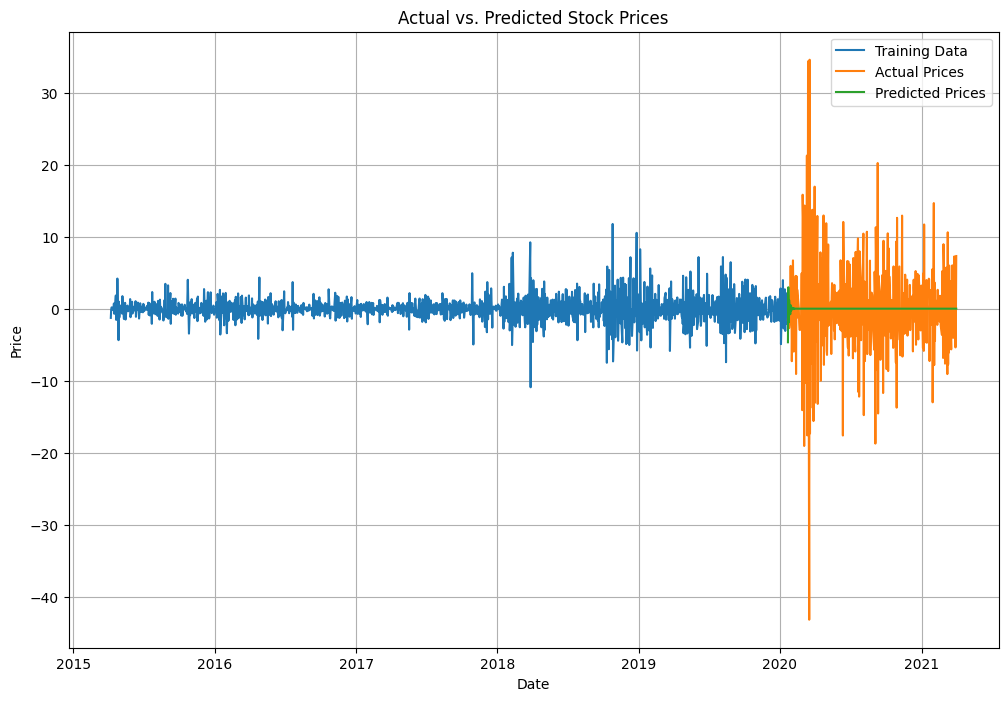

In [35]:

# Visualize actual and forecasted values
plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data['Close_diff2'], label='Training Data')
plt.plot(test_data.index, test_data['Close_diff2'], label='Actual Prices')
plt.plot(test_data.index, forecast_values, label='Predicted Prices')
plt.title('Actual vs. Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [45]:
# Fit SARIMA model
order = (1, 1, 1)  # Example non-seasonal order (p, d, q)
seasonal_order = (1, 1, 1, 12)  # Example seasonal order (P, D, Q, m)
model_s = SARIMAX(train_data['Close_diff2'], order=order, seasonal_order=seasonal_order)
results = model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.



/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: FutureWarning:

No supported index is available. In the next version, calling this method in a mo

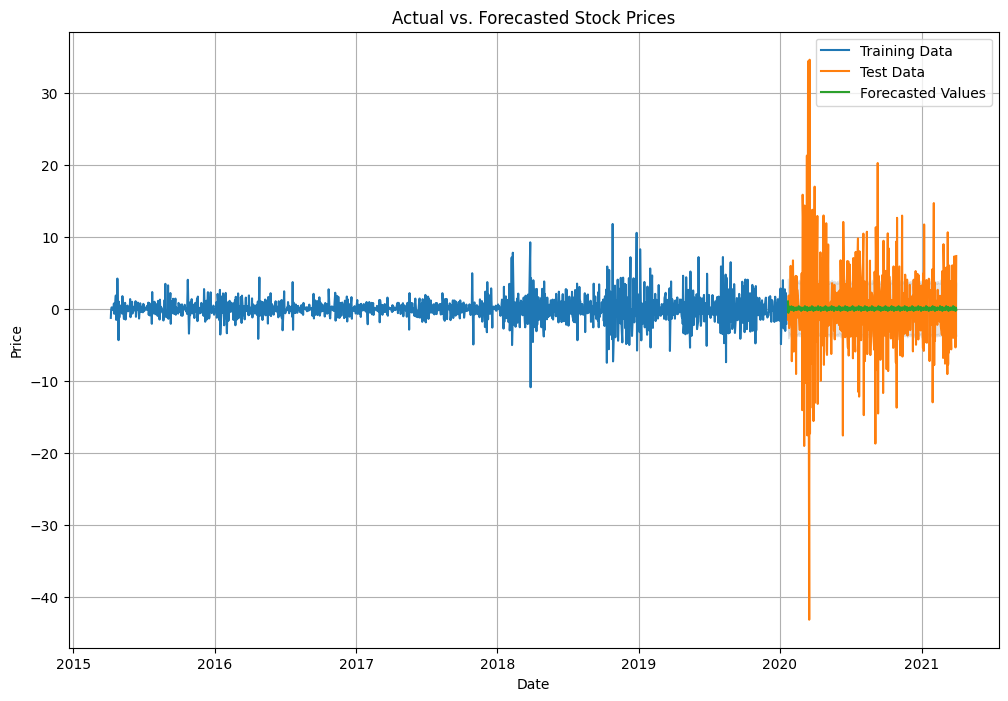

In [38]:


# Forecasting
forecast_steps = len(test_data)
forecast = results.get_forecast(steps=forecast_steps)
forecast_mean = forecast.predicted_mean
forecast_ci = forecast.conf_int()

# Plotting
plt.figure(figsize=(12, 8))
plt.plot(train_data.index, train_data['Close_diff2'], label='Training Data')
plt.plot(test_data.index, test_data['Close_diff2'], label='Test Data')
plt.plot(test_data.index, forecast_mean, label='Forecasted Values')
plt.fill_between(test_data.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='k', alpha=0.1)
plt.title('Actual vs. Forecasted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [39]:
print(forecast_mean)

1206    1.003827
1207   -0.577530
1208    0.343499
1209   -0.287114
1210    0.202884
          ...   
1503    0.038491
1504    0.233867
1505   -0.310208
1506    0.138095
1507   -0.150044
Name: predicted_mean, Length: 302, dtype: float64


In [ ]:
# ARIMA (AutoRegressive Integrated Moving Average)
#Strengths:
#Interpretability: The model parameters (p, d, q) provide insights into the autocorrelation structure, differencing requirements,
#and moving average terms affecting the data.
#Forecast Accuracy: ARIMA models can perform well when the underlying data has a clear linear trend and stationary patterns.
#Weaknesses:
#Seasonality Handling: Traditional ARIMA models do not handle seasonal variations directly.
# SARIMA (Seasonal ARIMA) models are required for seasonal data like stock prices, which have clear periodic patterns.
#Data Transformation: ARIMA models assume the data is stationary or can be made stationary through differencing.
#Non-stationary data may require complex transformations.

In [ ]:
#SARIMA (Seasonal ARIMA)
#Strengths:
#Seasonal Adjustment: SARIMA models extend ARIMA to include seasonal components (P, D, Q, m), making them suitable for data with clear seasonal patterns,
#such as quarterly or yearly stock prices.
#Flexibility: Can model both short-term and long-term patterns in seasonal data, improving forecast accuracy over ARIMA for seasonal datasets.
#Weaknesses:
#Complexity: SARIMA models add complexity compared to ARIMA due to the additional seasonal parameters.
#This complexity can make model selection and tuning more challenging.
#Data Requirements: SARIMA models require a sufficient amount of historical data to accurately capture seasonal patterns.
#Limited historical data can lead to less reliable forecasts.
